# Grab PODAAC MUR Product

## HTML link

https://cmr.earthdata.nasa.gov/virtual-directory/collections/C1996881146-POCLOUD/temporal

## PODAAC 

https://github.com/podaac/data-subscriber

https://podaacpy.readthedocs.io/en/latest/introduction.html


In [2]:
# imports
import os

import xarray

#from podaac import podaac

# Downloaded the latest image by navigating through the HTML links

In [2]:
ex_file = os.path.join(os.getenv('OS_SST'), 'MUR-JPL-L4',
                       '20250131090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc')
ds = xarray.open_dataset(ex_file)

In [3]:
ds

<xarray.Dataset> Size: 29GB
Dimensions:           (time: 1, lat: 17999, lon: 36000)
Coordinates:
  * time              (time) datetime64[ns] 8B 2025-01-31T09:00:00
  * lat               (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.98 89.99
  * lon               (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
Data variables:
    analysed_sst      (time, lat, lon) float64 5GB ...
    analysis_error    (time, lat, lon) float64 5GB ...
    mask              (time, lat, lon) float32 3GB ...
    sea_ice_fraction  (time, lat, lon) float64 5GB ...
    dt_1km_data       (time, lat, lon) timedelta64[ns] 5GB ...
    sst_anomaly       (time, lat, lon) float64 5GB ...
Attributes: (12/47)
    Conventions:                CF-1.7
    title:                      Daily MUR SST, Interim near-real-time (nrt) p...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    near real time (nrt) version created at nomin...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

In [4]:
ds.analysed_sst

<xarray.DataArray 'analysed_sst' (time: 1, lat: 17999, lon: 36000)> Size: 5GB
[647964000 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-01-31T09:00:00
  * lat      (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon      (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -32767
    valid_max:      32767
    comment:        Interim near-real-time (nrt) version using Multi-Resoluti...
    source:         MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTB_G-NAVO, i...

# Let's plot a window 

In [13]:
lat_slice=slice(18., 23.)
lon_slice=slice(127., 134)
sst_arcterx = ds.analysed_sst.sel(lat=lat_slice, lon=lon_slice)

In [14]:
sst_arcterx

<xarray.DataArray 'analysed_sst' (time: 1, lat: 501, lon: 701)> Size: 3MB
[351201 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-01-31T09:00:00
  * lat      (lat) float32 2kB 18.0 18.01 18.02 18.03 ... 22.97 22.98 22.99 23.0
  * lon      (lon) float32 3kB 127.0 127.0 127.0 127.0 ... 134.0 134.0 134.0
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -32767
    valid_max:      32767
    comment:        Interim near-real-time (nrt) version using Multi-Resoluti...
    source:         MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTB_G-NAVO, i...

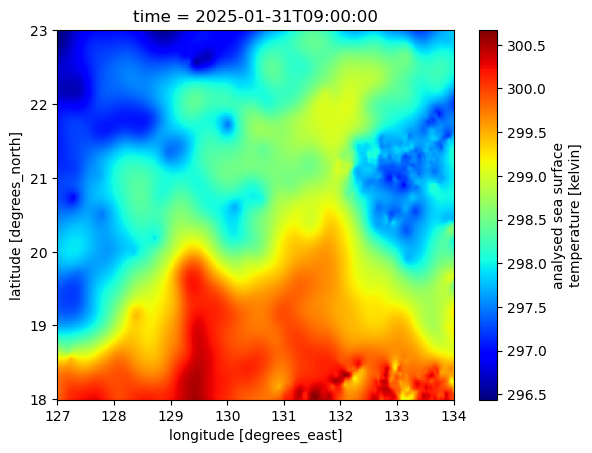

In [16]:
sst_arcterx.plot(cmap='jet')

# Grabbing this with podaacpy

In [18]:
# Initialize the podaac api
p = podaac.Podaac()

In [ ]:
# Search for datasets
dataset_search = p.dataset_search(keyword='sst')  # sea surface temperature

In [ ]:
# Get dataset details
dataset_id = dataset_search[0]['id']  # first result
dataset_details = p.dataset_details(dataset_id=dataset_id)